# Decision Trees

A decision tree is a hierarchical model that represents decisions and their possible outcomes. It is a popular machine learning algorithm that can be used for both classification and regression tasks. The basic idea behind decision trees is to recursively partition the feature space into smaller and smaller regions until each region contains a homogeneous set of examples with respect to the target variable. The algorithm uses a splitting criterion to determine which feature to split on and at what threshold.

## Splitting Criterion

The splitting criterion is used to determine the best way to split the data at each node of the tree. There are several splitting criteria that can be used, including:
1. Information gain (ID3 algorithm):

    $IG(S,A)=H(S)−H(S∣A)$
    
    where $S$ is the set of examples at the current node, $A$ is the feature to split on, $H(S)$ is the entropy of the target variable at node $S$, and $H(S|A)$ is the conditional entropy of the target variable given feature $A$.
2. Gini impurity (CART algorithm):

   $Gini(S) = 1 - ∑_{k=1}^{|Y|} p_k^2$

    where $S$ is the set of examples at the current node, $|Y|$ is the number of classes, and $p_k$ is the proportion of examples in class $k$.
3. Variance reduction:

   $Var(S) = \frac{1}{N}∑_{k=1}^{N} (y_i - \bar{y})^2$

   where $S$ is the set of examples at the current node, $N$ is the number of examples, $y_i$ is the target variable for example $i$, and $\bar{y}$ is the mean target variable for the examples in $S$.

## Building the Tree

To build a decision tree, we start with the root node, which contains all the examples in the training set. We then recursively split each node into smaller nodes based on the splitting criterion, until we reach a stopping criterion, such as reaching a maximum depth or having too few examples at a node.

The splitting criterion is used to determine which feature to split on and at what threshold. We select the feature and threshold that maximizes the splitting criterion. We then create two child nodes, one for each possible outcome of the split. We continue this process until the stopping criterion is met.

## Pruning



Decision trees can suffer from overfitting, where the tree is too complex and captures noise in the training set. To prevent overfitting, we can prune the tree by removing branches that do not improve the performance on a validation set. There are several pruning algorithms, including reduced error pruning and cost complexity pruning.

## Advantages and Disadvantages

Advantages:

- Easy to understand and interpret
- Can handle both numerical and categorical data
- Can handle missing values

Disadvantages:

- Prone to overfitting
- Can be biased towards features with many values
- Can be sensitive to small changes in the data

## Decision Trees for Classification 


Unlike linear models, decision trees are non-parametric models: they are not controlled by a mathematical decision function and do not have weights or intercept to be optimized.
Indeed, decision trees will partition the space by considering a single feature at a time. Let's illustrate this behaviour by having a decision tree make a single split to partition the feature space.

In [28]:
import pandas as pd

reg_penguins = pd.read_csv("penguins.csv")
reg_penguins.dropna(inplace=True)
culmen_columns = ["bill_length_mm", "bill_depth_mm"]
target_column = "species"

In [29]:
from sklearn.model_selection import train_test_split

data, target = reg_penguins[culmen_columns], reg_penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=1)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=1)

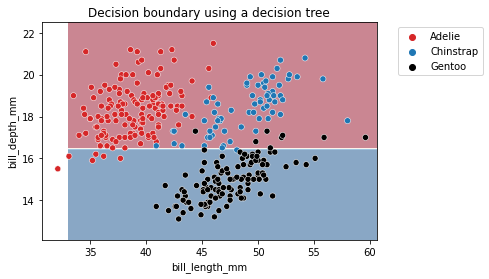

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
palette = ["tab:red", "tab:blue", "black"]

DecisionBoundaryDisplay.from_estimator(
    tree, data_train, response_method="predict", cmap="RdBu", alpha=0.5
)
sns.scatterplot(data=reg_penguins, x=culmen_columns[0], y=culmen_columns[1],
                hue=target_column, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
_ = plt.title("Decision boundary using a decision tree")

The partitions found by the algorithm separates the data along the axis "bill_depth_mm", discarding the feature "bill_length_mm". Thus, it highlights that a decision tree does not use a combination of feature when making a split. We can look more in depth at the tree structure.

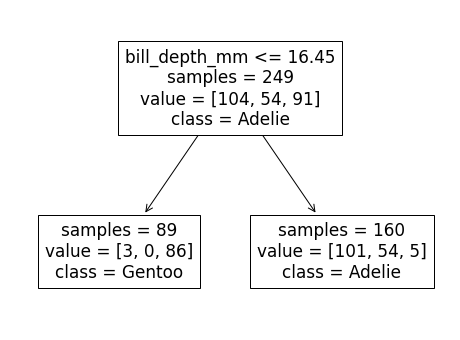

In [33]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=culmen_columns,
              class_names=tree.classes_, impurity=False, ax=ax)

We see that the split was done on the bill depth feature. The original dataset was subdivided into 2 sets based on the bill depth (inferior or superior to 16.45 mm). This partition of the dataset minimizes the class diversities in each sub-partitions.

If we look more closely at the partition, we see that the sample superior to 16.45 belongs mainly to the Adelie class. Looking at the values, we indeed observe 104 Adelie individuals in this space. We also count 54 Chinstrap samples and 91 Gentoo samples. We can make similar interpretation for the partition defined by a threshold inferior to 16.45mm. In this case, the most represented class is the Gentoo species.

During the training, we have a count of samples in each partition, we can also compute the probability of belonging to a specific class within this partition.

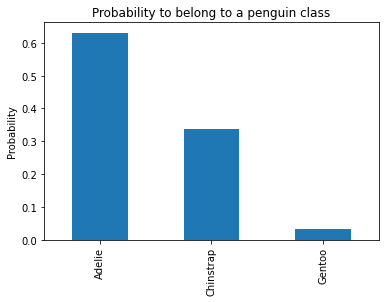

In [34]:
sample = pd.DataFrame(
    {"bill_length_mm": [0], "bill_depth_mm": [17]}
)

tree.predict(sample)
y_pred_proba = tree.predict_proba(sample)
y_proba_class_0 = pd.Series(y_pred_proba[0], index=tree.classes_)
y_proba_class_0.plot.bar()
plt.ylabel("Probability")
_ = plt.title("Probability to belong to a penguin class")

Going back to our classification problem, the split found with a maximum depth of 1 is not powerful enough to separate the three species and the model accuracy is low when compared to a linear model like Logistic Regression.

In [35]:
tree.fit(data_train, target_train)
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.76


## Decision Trees for Regression


We present how decision trees are working in regression problems. We show differences with the decision trees previously presented in a classification setting.

In [36]:
clf_penguins = pd.read_csv("penguins.csv")
clf_penguins.dropna(inplace=True)
feature_name = "flipper_length_mm"
target_name = "body_mass_g"
data_train, target_train = clf_penguins[[feature_name]], clf_penguins[target_name]

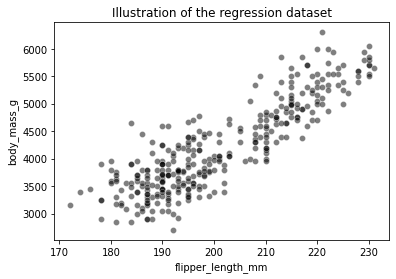

In [37]:
sns.scatterplot(data=clf_penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
_ = plt.title("Illustration of the regression dataset")

To illustrate how decision trees are predicting in a regression setting, we will create a synthetic dataset containing all possible flipper length from the minimum to the maximum of the original data.

In [38]:
import numpy as np
data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),
                                   data_train[feature_name].max()),
                                   columns=[feature_name])

Now we train the decision tree model on the dataset

In [39]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

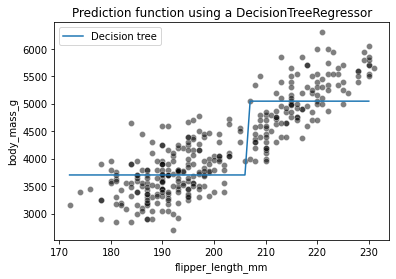

In [40]:
sns.scatterplot(data=clf_penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

We see that the decision tree model does not have an a priori distribution for the data and we do not end-up with a straight line to regress flipper length and body mass. Instead, we observe that the predictions of the tree are piecewise constant. Indeed, our feature space was split into two partitions. Let's check the tree structure to see what was the threshold found during the training.

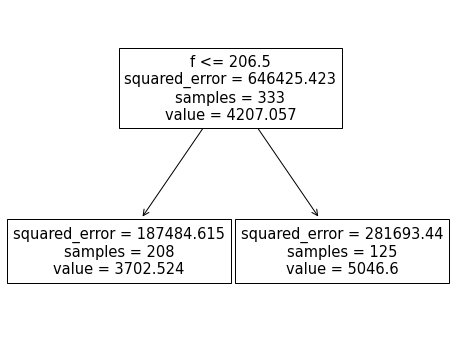

In [41]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=feature_name, ax=ax)

The threshold for our feature (flipper length) is 206.5 mm. The predicted values on each side of the split are two constants: 3702.524 g and 5046.6 g. These values corresponds to the mean values of the training samples in each partition.

Increasing the depth of the tree allowed us to get more complex decision boundaries. Let's check the effect of increasing the depth in a regression setting

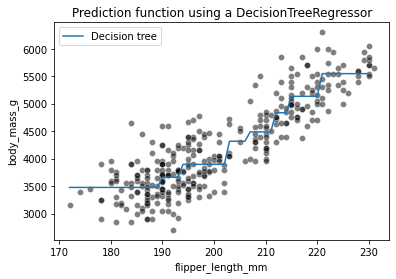

In [42]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)
sns.scatterplot(data=clf_penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

Increasing the depth of the tree will increase the number of partition and thus the number of constant values that the tree is capable of predicting.

## Decision Tree Hyperparameters

To avoid overfitting the training data, you need to restrict the decision tree’s freedom during training. As you know by now, this is called regularization. The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the decision tree. Reducing max_depth will regularize the model and thus reduce the risk of overfitting. The `DecisionTreeClassifier` class has a few other parameters that similarly restrict the shape of the decision tree:
1. max_features

    Maximum number of features that are evaluated for splitting at each node
2. max_leaf_nodes

    Maximum number of leaf nodes
3. min_samples_split

    Minimum number of samples a node must have before it can be split
4. min_samples_leaf

    Minimum number of samples a leaf node must have to be created
5. min_weight_fraction_leaf

    Same as min_samples_leaf but expressed as a fraction of the total number of
    weighted instances

Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize
the model.

For further investigation, we demonstrate the effect of `max_depth` parameter in a classification problem

As metioned earlier, `max_depth` controls the overall complexity of a decision tree. This hyperparameter allows to get a trade-off between an under-fitted and over-fitted decision tree. Let's build a shallow tree and then a deeper tree to understand the impact of the parameter.

We can first set the `max_depth` parameter value to a very low value.

In [43]:
def fit_and_plot_classification(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    if data[target_names].nunique() == 2:
        palette = ["tab:red", "tab:blue"]
    else:
        palette = ["tab:red", "tab:blue", "black"]
    DecisionBoundaryDisplay.from_estimator(
        model, data[feature_names], response_method="predict",
        cmap="RdBu", alpha=0.5
    )
    sns.scatterplot(data=data, x=feature_names[0], y=feature_names[1],
                    hue=target_names, palette=palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

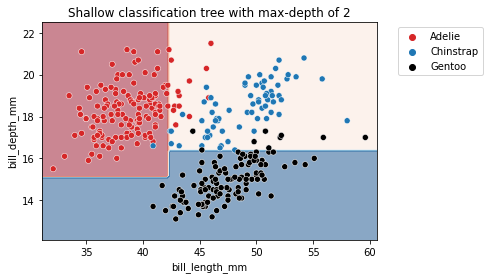

In [44]:
max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
data_clf_columns = ["bill_length_mm", "bill_depth_mm"]
target_clf_column = "species"
fit_and_plot_classification(
    tree_clf, clf_penguins, data_clf_columns, target_clf_column)
_ = plt.title(f"Shallow classification tree with max-depth of {max_depth}")

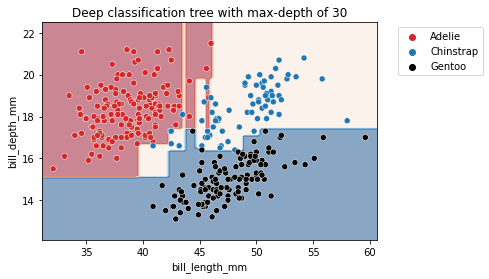

In [45]:
max_depth = 30
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
fit_and_plot_classification(
    tree_clf, clf_penguins, data_clf_columns, target_clf_column)
_ = plt.title(f"Deep classification tree with max-depth of {max_depth}")

We observe that increasing the depth will make the tree model more expressive. However, a tree that is too deep will overfit the training data, creating partitions which are only correct for "outliers" (noisy samples). The `max_depth` is one of the hyperparameters that one should optimize via cross-validation and grid-search.

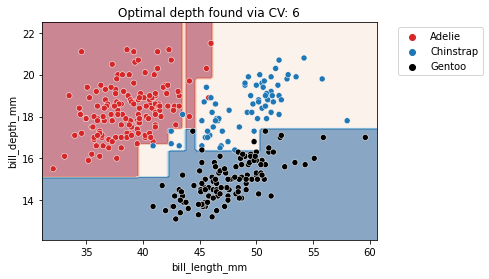

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": np.arange(2, 10, 1)}
tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
fit_and_plot_classification(
    tree_clf, clf_penguins, data_clf_columns, target_clf_column)
_ = plt.title(f"Optimal depth found via CV: "
              f"{tree_clf.best_params_['max_depth']}")

With this simple example, we see that there is not a single value that is optimal for any dataset. Thus, this parameter is required to be optimized for each application. We also should optimize other hyperparameters that mentioned above to get better performance on our desired dataset.

## References
- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition
- Machine learning in Python with scikit-learn
